<a href="https://colab.research.google.com/github/RachelRFode/jax_stocks_experiments1/blob/master/Jax_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#References

https://colab.research.google.com/github/google/jax/blob/master/docs/notebooks/autodiff_cookbook.ipynb

https://colab.research.google.com/github/google/jax/blob/master/docs/notebooks/quickstart.ipynb

# Retrieve stocks

Install and import alpaca trade api that allows you to get stock data and simulate trades

In [0]:
!pip install alpaca-trade-api

     |████████████████████████████████| 204kB 9.2MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
  Created wheel for asyncio-nats-client: filename=asyncio_nats_client-0.10.0-cp36-none-any.whl size=21612 sha256=0092c485b84864b41ec91649a81a996731fa87bfe868331fea7e0452f49073e7
  Stored in directory: /root/.cache/pip/wheels/21/41/ba/99c64794c44114bce891c814c6e242a152340c978c5907a82b
Successfully built asyncio-nats-client


In [0]:
#@title Default title text
API_ID = "" #@param {type:"string"}
API_KEY = "" #@param {type:"string"}

In [0]:
import alpaca_trade_api as alpaca
api = alpaca.REST(API_ID, API_KEY, 'https://paper-api.alpaca.markets')

Submit an order

In [0]:
api.get_account()

Account({   'account_blocked': False,
    'account_number': 'PA2CY6CKHNZ3',
    'buying_power': '398475.95',
    'cash': '98830.34',
    'created_at': '2019-10-11T03:44:03.796434Z',
    'currency': 'USD',
    'daytrade_count': 0,
    'daytrading_buying_power': '398475.95',
    'equity': '100046.79',
    'id': 'dc7e585b-83a9-4f00-a2ad-21d68aec3366',
    'initial_margin': '732.91',
    'last_equity': '100046.04',
    'last_maintenance_margin': '364.71',
    'long_market_value': '1216.45',
    'maintenance_margin': '364.935',
    'multiplier': '4',
    'pattern_day_trader': False,
    'portfolio_value': '100046.79',
    'regt_buying_power': '198627.76',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '0',
    'status': 'ACTIVE',
    'trade_suspended_by_user': False,
    'trading_blocked': False,
    'transfers_blocked': False})

In [0]:
api.submit_order('AAPL', side='buy', qty=1, type='market', time_in_force='gtc')

Order({   'asset_class': 'us_equity',
    'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
    'canceled_at': None,
    'client_order_id': '334bc290-f916-40c7-aaef-8de4e91720c4',
    'created_at': '2019-10-25T03:42:22.842468941Z',
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'id': 'd0fc5225-f5e1-489a-ae53-800192e68a40',
    'limit_price': None,
    'order_type': 'market',
    'qty': '1',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': 'buy',
    'status': 'new',
    'stop_price': None,
    'submitted_at': '2019-10-25T03:42:22.829329879Z',
    'symbol': 'AAPL',
    'time_in_force': 'gtc',
    'type': 'market',
    'updated_at': '2019-10-25T03:42:22.847795593Z'})

See you positions during market open

In [0]:
api.list_positions()

[Position({   'asset_class': 'us_equity',
     'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
     'avg_entry_price': '233.932',
     'change_today': '0.0004523398305782',
     'cost_basis': '1169.66',
     'current_price': '243.29',
     'exchange': 'NASDAQ',
     'lastday_price': '243.18',
     'market_value': '1216.45',
     'qty': '5',
     'side': 'long',
     'symbol': 'AAPL',
     'unrealized_intraday_pl': '0.55',
     'unrealized_intraday_plpc': '0.0004523398305782',
     'unrealized_pl': '46.79',
     'unrealized_plpc': '0.0400030778174854'})]

See your orders

In [0]:
api.list_orders()

[Order({   'asset_class': 'us_equity',
     'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
     'canceled_at': None,
     'client_order_id': '334bc290-f916-40c7-aaef-8de4e91720c4',
     'created_at': '2019-10-25T03:42:22.842469Z',
     'expired_at': None,
     'extended_hours': False,
     'failed_at': None,
     'filled_at': None,
     'filled_avg_price': None,
     'filled_qty': '0',
     'id': 'd0fc5225-f5e1-489a-ae53-800192e68a40',
     'limit_price': None,
     'order_type': 'market',
     'qty': '1',
     'replaced_at': None,
     'replaced_by': None,
     'replaces': None,
     'side': 'buy',
     'status': 'new',
     'stop_price': None,
     'submitted_at': '2019-10-25T03:42:22.82933Z',
     'symbol': 'AAPL',
     'time_in_force': 'gtc',
     'type': 'market',
     'updated_at': '2019-10-25T03:42:22.847796Z'}),
 Order({   'asset_class': 'us_equity',
     'asset_id': 'b0b6dd9d-8b9b-48a9-ba46-b9d54906e415',
     'canceled_at': None,
     'client_order_id': '85cd0a74-2e6f-44

#Graph data

Show data

In [0]:
count = 1000
df1 = api.get_barset('BUD', 'day', limit=count).df

In [0]:
df2 = api.get_barset('BREW', 'day', limit=count).df
df3 = api.get_barset('DEO', 'day', limit=count).df
df4 = api.get_barset('PFE', 'day', limit=count).df

Candlestick graph

In [0]:
!pip install mpl_finance

  Created wheel for mpl-finance: filename=mpl_finance-0.10.0-cp36-none-any.whl size=5509 sha256=9a1c19a8621efcaa125192bdf606de0032eb938a40a0e8f2c6558abdbea98032
  Stored in directory: /root/.cache/pip/wheels/67/db/24/04ddd06ec9a5e4500b44c13d8e95898f5b90b512303e385de8
Successfully built mpl-finance


([<matplotlib.lines.Line2D at 0x7facb81a4fd0>,
  <matplotlib.patches.Rectangle at 0x7facb7cbc9b0>])

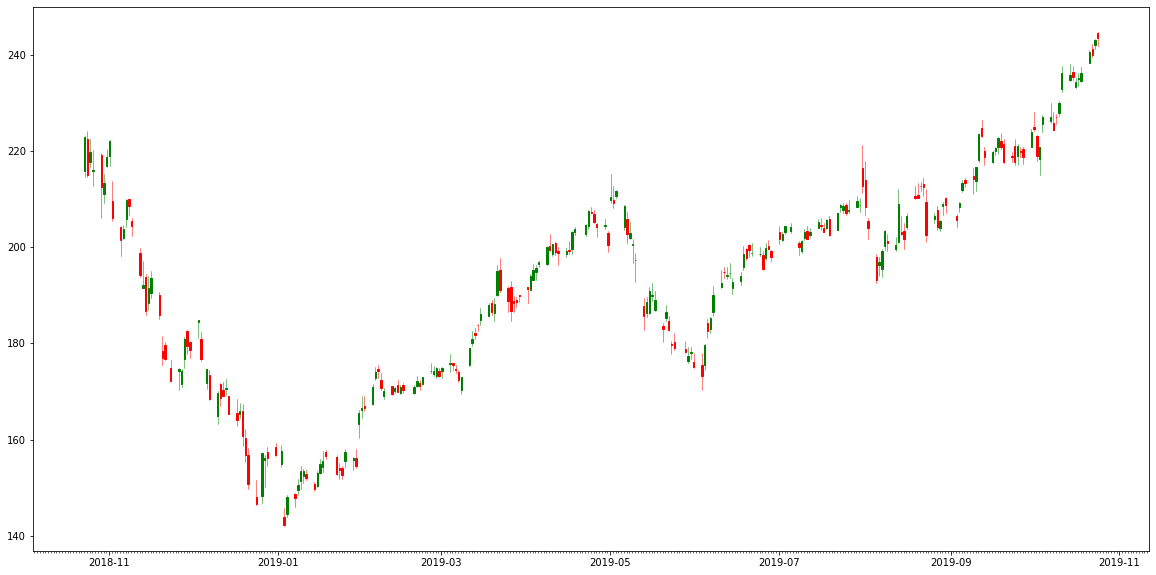

In [0]:
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
df = api.get_barset('AAPL', 'day', limit=253).df['AAPL']
quotes = zip(mdates.date2num(df.index.to_pydatetime()),
             df.open, df.high, df.low, df.close)
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis_date()
ax.autoscale_view()
alldays = DayLocator()
ax.xaxis.set_minor_locator(alldays)
candlestick_ohlc(ax, quotes, width=0.5, colorup='g', colordown='r')

#JAX

In [0]:
import jax.numpy as np
from jax.experimental import optimizers
from jax import grad, jit, vmap
from jax import random
import itertools
import time

key = random.PRNGKey(0)

In [0]:
df1_close = df1['BUD']['close']

In [0]:
df2_close = df2['BREW']['close']

In [0]:
df3_close = df3['DEO']['close']

In [0]:
df4_close = df4['PFE']['close']

Dynamic

In [0]:
#linear regression to create predicted outcomes
def predict_multi(params, ticker_data_array):
  

In [0]:
#linear regression to create predicted outcomes
def predict(params, ticker_data):
    c1, c2, c3, b = params
    return c1 * np.power(ticker_data,3) + c2 * np.power(ticker_data,2) + c3 *ticker_data + b

#linear regressions using multiple stocks to created predicted outcomes
def predict2(params, ticker_data1, ticker_data2, ticker_data3):
  c1, c2, c3, b = params
  return c1 * ticker_data1 + c2 * ticker_data2 + c3 * ticker_data3 + b

#Data set
targets = df1_close.to_numpy()
inputs = df2_close.to_numpy()

inputs1 = df2_close.to_numpy()
inputs2 = df3_close.to_numpy()
inputs3 = df4_close.to_numpy()

# Sum of difference between predictions and targets
def loss(params, inputs, targets):
    preds = predict(params, inputs)
    dif = preds - targets
    return np.abs(np.sum(dif))

def loss2(params, input1, input2, input3, targets):
    preds = predict2(params, input1, input2, input3)
    dif = preds - targets
    return np.abs(np.sum(dif))

# Initialize random model coefficients
def init_random_param(key):
  key, c1_key, c2_key, b_key = random.split(key, 4)

  return random.normal(key,(4,))

DeviceArray([ 1.81608629, -0.48262316,  0.33988908], dtype=float32)

In [0]:
# Differentiate `loss` with respect to the first positional argument:
param = init_random_param(key)
params_grad = grad(loss)(param, inputs, targets)
print('params_grad', params_grad)


params_grad [-4.0788788e+06 -2.4254488e+05 -1.5073790e+04 -1.0000000e+03]


In [0]:
step_size = 0.0001
num_epochs = 1000
batch_size = 128
momentum_mass = 0.9

In [0]:
opt_init, opt_update, get_params = optimizers.momentum(step_size, mass=momentum_mass)

In [0]:
@jit
def update(i, opt_state, inputs, targets):
  params = get_params(opt_state)
  return opt_update(i, grad(loss)(params, inputs, targets), opt_state)

init_params = init_random_param(key)
opt_state = opt_init(init_params)
itercount = itertools.count()

print("init_params", init_params)

loss_history = []

print("\nStarting training...")
for epoch in range(num_epochs):
  start_time = time.time()
  opt_state = update(next(itercount), opt_state, inputs, targets)
  epoch_time = time.time() - start_time

  params = get_params(opt_state)
  #print("params", params)
  train_acc = loss(params, inputs, targets)
  test_acc = loss(params, inputs, targets)
  loss_history.append(train_acc)
  #print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
  #print("Training set accuracy {}".format(train_acc))
  #print("Test set accuracy {}".format(test_acc))

plt.plot(loss_history)
plt.figure()
plt.plot(targets)
plt.figure()
plt.plot(predict(get_params(opt_state), inputs))

init_params [-0.486901    0.44806498 -1.4662383  -2.1836991 ]

Starting training...


NameError: ignored

init_params [-0.486901    0.44806498 -1.4662383  -2.1836991 ]

Starting training...


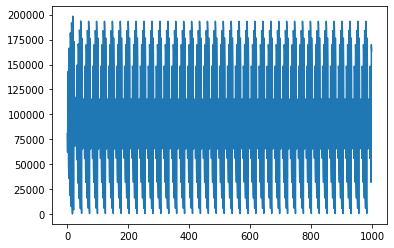

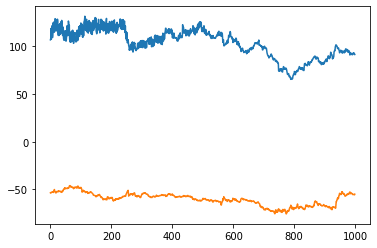

In [0]:
@jit
def update(i, opt_state, inputs1, inputs2, inputs3, targets):
  params = get_params(opt_state)
  return opt_update(i, grad(loss2)(params, inputs1, inputs2, inputs3, targets), opt_state)

init_params = init_random_param(key)
opt_state = opt_init(init_params)
itercount = itertools.count()

print("init_params", init_params)

loss_history = []

print("\nStarting training...")
for epoch in range(num_epochs):
  start_time = time.time()
  opt_state = update(next(itercount), opt_state, inputs1, inputs2, inputs3, targets)
  epoch_time = time.time() - start_time

  params = get_params(opt_state)
  #print("params", params)
  train_acc = loss2(params, inputs1, inputs2, inputs3, targets)
  test_acc = loss2(params, inputs1, inputs2, inputs3, targets)
  loss_history.append(train_acc)
  #print("Epoch {} in {:0.2f} sec".format(epoch, epoch_time))
  #print("Training set accuracy {}".format(train_acc))
  #print("Test set accuracy {}".format(test_acc))

plt.plot(loss_history)
plt.figure()
plt.plot(targets)
plt.plot(predict2(get_params(opt_state), inputs1, inputs2, inputs3))

GOALS - bundle up current stuff we have so that you can just feed a list of ticker symbols